# Generarea variabilelor aleatoare

In [16]:
import numpy as np
from numpy.random import gamma
import random
from random import uniform as U
from random import gammavariate
import matplotlib.pyplot as plt 

Generarea variabilei Beta(0.75,4) prin două metode.

In [5]:
def generare_beta1(a,b):
    "Folosind distributia gamma"
    x_1 = gammavariate(a, 1)
    x_2 = gammavariate(b, 1)
    
    return x_1 / (x_1 + x_2)


"""
Fie 0 < a < 1, b > 1 ̧si U1, U2 variabile aleatoare uniforme pe [0,1] independente. Daca V = U1^(1/a), T = U2^(1/(b − 1)), 
atunci repartitia variabilei V conditionata de V + T < 1 este Beta(a,b).
"""
def generare_beta2(a,b):
    "Folosind distributia uniformă"
    v = U(0, 1) ** (1 / a)
    if b > 1.0:
        t = U(0, 1) ** (1 / (b - 1))
    else:
        t = U(0, 1) ** (1 / b)
    
    while t + v >= 1.0:
        v = U(0, 1) ** (1 / a)
        if b > 1.0:
            t = U(0, 1) ** (1 / (b - 1))
        else:
            t = U(0, 1) ** (1 / b)

    if b > 1.0:
        return v
    return v / (v + t)

In [6]:
a, b = 0.75, 4.0

beta1 = generare_beta1(a,b)
print(beta1)
beta2 = generare_beta2(a,b)
print(beta2)

0.32713029793341
0.4652721566139103


Pentru verificare putem genera un eșantioane cu ambele funcții definite mai sus și să comparăm media și derivația standard a celor două eșantioane cu media și deviația standard teoretice.

In [8]:
mean = a / (a + b)
# variance = (a * b) / ((a + b + 1) * ((a + b) ** 2))
# standard_deviation = np.sqrt(variance)
standard_deviation = (1 / (a + b)) * np.sqrt(a * b / (a + b + 1))
print("Mean:", mean)
print("Standard deviation:", standard_deviation)

Mean: 0.15789473684210525
Standard deviation: 0.15206634073991898


In [30]:
num_samples = 1000

sample1 = [generare_beta1(a,b) for _ in range(num_samples)]
sample2 = [generare_beta2(a,b) for _ in range(num_samples)]

mean_sample1, mean_sample2 = np.mean(sample1), np.mean(sample2)
std_sample1, std_sample2 = np.std(sample1), np.std(sample2)

print("First sample: E = {0:.7f}  Std = {0:.7f}".format(mean_sample1, std_sample1))
print("Second sample: E = {0:.7f}  Std = {0:.7f}".format(mean_sample2, std_sample2))

First sample: E = 0.1582261  Std = 0.1582261
Second sample: E = 0.1578554  Std = 0.1578554


Pentru primul eșantion de date, cel generat cu prima funcție, plotăm un graf pentru a observa distribuția gamma și o histogramă pentru observarea densității.

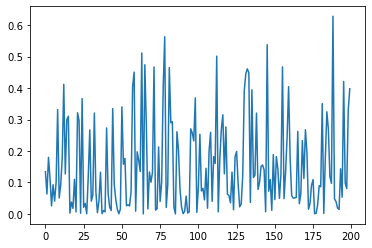

In [31]:
plt.plot(sample1[:200]) 
plt.show()

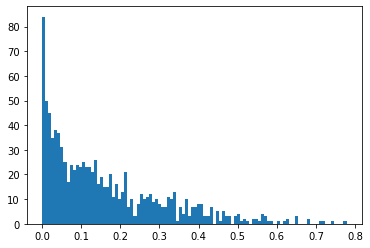

In [34]:
plt.hist(sample1, bins = 100) 
plt.show()

Generarea variabilei hipergeometrice cu parametri citiți de la tastatură.

In [47]:
def hypergeometric(a, b, num_attempts):
    n = a + b
    p = a / n
    count, x, s = 0, 0, 0
    
    while count < num_attempts:
        # Step 1: Generate U ~ U(0,1)
        count += 1
        u = U(0,1)
        if u < p: # a white ball was extracted
            x += 1
            s = 1
        else: # a black ball was extracted
            s = 0

        a -= s
        p = a / n
        n -= 1
    
    return x

In [67]:
hyper = hypergeometric(3,6,9)
print(hyper)

3
